# Phân tích dữ liệu COVID-19 trên thế giới vào ngày 30/4/2022



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Khám phá dữ liệu

In [4]:
#read_csv
covid_data_df = pd.read_csv('covid_data_04_30_22.csv')
covid_data_df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
0,World,"512,954,708","+150,094","6,259,436",427.0,"466,821,638","+167,011","39,873,634","41,358","65,807",803.0,NaN,NaN,NaN
1,USA,"83,037,059",NaN,"1,020,660",NaN,"80,655,685",NaN,"1,360,714","1,562","248,214","3,051","1,005,251,244","3,004,892","334,538,223"
2,India,"43,075,864",NaN,"523,803",NaN,"42,533,377",NaN,"18,684",698,"30,665",373,"837,442,023","596,164","1,404,717,429"
3,Brazil,"30,433,042",NaN,"663,484",NaN,"29,507,557",NaN,"262,001","8,318","141,344","3,082","63,776,166","296,204","215,311,673"
4,France,"28,595,803",NaN,"145,869",NaN,"26,693,852",NaN,"1,756,082","1,677","436,333","2,226","266,484,045","4,066,187","65,536,600"


In [5]:
# dữ liệu có 229 dòng và 14 cột
covid_data_df.shape

(229, 14)

In [6]:
# Kiểu dữ liệu của mỗi cột
covid_data_df.dtypes

Country,Other        object
TotalCases           object
NewCases             object
TotalDeaths          object
NewDeaths           float64
TotalRecovered       object
NewRecovered         object
ActiveCases          object
Serious,Critical     object
TotCases/1M pop      object
Deaths/1M pop        object
TotalTests           object
Tests/1M pop         object
Population           object
dtype: object

### Tiền xử lý dữ liệu:

+ Loại bỏ bớt một số cột không định dùng trong quá trình tính toán (những cột thiếu quá nhiều dữ liệu như "NewCases","NewDeaths", "NewRecovered  ")
+ Chuyển đổi các cột đang xét sang dạng dữ liệu thích hợp

In [7]:
covid_data_df.drop(['NewCases','NewDeaths','NewRecovered'], axis=1, inplace=True)
numpy_col=['TotalCases','TotalDeaths','TotalRecovered','ActiveCases','Serious,Critical','TotCases/1M pop','Deaths/1M pop','TotalTests','Tests/1M pop','Population']

for col in numpy_col :
  covid_data_df[col]=covid_data_df[col].str.replace(',','')
  covid_data_df=covid_data_df.astype({col : 'float'})

covid_data_df.head()

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
0,World,512954708.0,6259436.0,466821638.0,39873634.0,41358.0,65807.0,803.0,NaN,NaN,NaN
1,USA,83037059.0,1020660.0,80655685.0,1360714.0,1562.0,248214.0,3051.0,1.005251e+09,3004892.0,3.345382e+08
2,India,43075864.0,523803.0,42533377.0,18684.0,698.0,30665.0,373.0,8.374420e+08,596164.0,1.404717e+09
3,Brazil,30433042.0,663484.0,29507557.0,262001.0,8318.0,141344.0,3082.0,6.377617e+07,296204.0,2.153117e+08
4,France,28595803.0,145869.0,26693852.0,1756082.0,1677.0,436333.0,2226.0,2.664840e+08,4066187.0,6.553660e+07


In [8]:
covid_data_df.dtypes

Country,Other        object
TotalCases          float64
TotalDeaths         float64
TotalRecovered      float64
ActiveCases         float64
Serious,Critical    float64
TotCases/1M pop     float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
Population          float64
dtype: object

### Tổng ca nhiễm mỗi quốc gia chiếm bao nhiêu phần trăm so với tổng ca nhiễm của thế giới?

In [ ]:
total=covid_data_df['TotalCases'].iloc[0]
list_country=covid_data_df.sort_values(by='TotalCases',ascending=False)[1:]
list_country=np.array(list_country['TotalCases'])
list_country=list_country/total*100
list_country=np.round_(list_country,decimals=3)
another_country =list_country[list_country<1].sum()
another_country 
list_country=list_country[list_country>1]
list_country=np.append(list_country,another_country )
country_label=covid_data_df["Country,Other"][1: list_country.size]
country_label=np.array(country_label)
country_label=np.append(country_label,"another_country ");

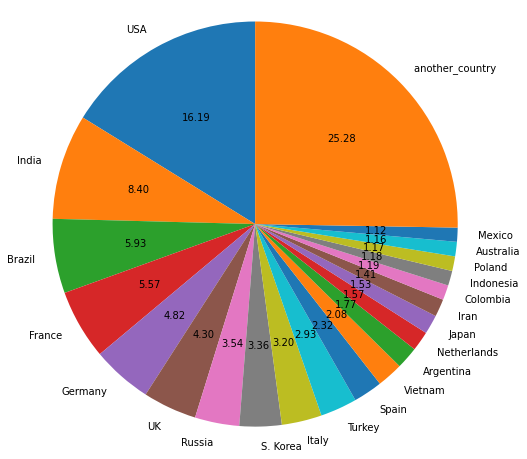

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(list_country,

        labels=country_label,

        autopct='%1.2f',

        startangle=90)
ax.axis('equal')
plt.show()

Nhìn vào pie chart ta thấy USA, India và Brazil là các nước có tổng số ca nhiễm (TotalCases) lớn nhất. Việt Nam chiếm khoảng 2.08% tổng số ca nhiễm trên thế giới

### Nhận xét về mức tử vong (TotalDeaths), mức phục hồi (TotalRecovered) và mức đang điều trị (ActiveCases) trên tổng số ca nhiễm (TotalCases)

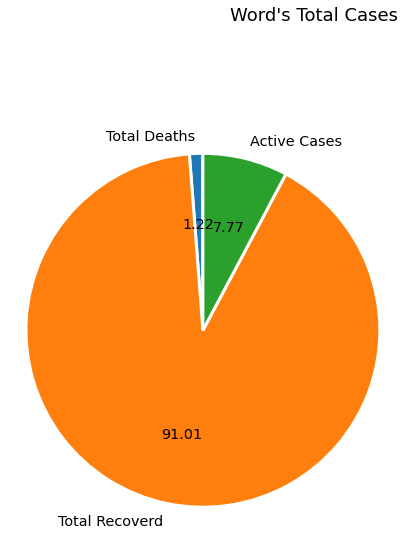

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(covid_data_df.iloc[0][2:5].values,

        labels=["Total Deaths","Total Recoverd","Active Cases"],
       
        autopct='%1.2f',textprops={'size': 'x-large'},wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},

        startangle=90)
ax.axis('equal')
ax.set_title("Word's Total Cases",fontsize=18,loc ='right',y=1.3)
plt.show()


Nhìn chung, khả năng hồi phục của bệnh là khá cao, số ca đang điều trị ở phạm vi trung bình (dịch bệnh đã được kiểm soát). Tỷ lệ tử vong của bệnh khá thấp

## Phân tích dữ liệu của 10 quốc gia có tổng số ca nhiễm (TotalCases) nhiều nhất trên thế giới




In [9]:
top_10_totalcases= covid_data_df.sort_values(by=['TotalCases'],ascending=False)[1:12]
top_10_totalcases

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
1,USA,83037059.0,1020660.0,80655685.0,1360714.0,1562.0,248214.0,3051.0,1.005251e+09,3004892.0,3.345382e+08
2,India,43075864.0,523803.0,42533377.0,18684.0,698.0,30665.0,373.0,8.374420e+08,596164.0,1.404717e+09
3,Brazil,30433042.0,663484.0,29507557.0,262001.0,8318.0,141344.0,3082.0,6.377617e+07,296204.0,2.153117e+08
4,France,28595803.0,145869.0,26693852.0,1756082.0,1677.0,436333.0,2226.0,2.664840e+08,4066187.0,6.553660e+07
5,Germany,24704597.0,135794.0,22307900.0,2260903.0,1446.0,293153.0,1611.0,1.223324e+08,1451639.0,8.427193e+07
6,UK,22038340.0,174912.0,21168267.0,695161.0,302.0,321561.0,2552.0,5.173376e+08,7548453.0,6.853558e+07
7,Russia,18174991.0,375727.0,17528963.0,270301.0,2300.0,124445.0,2573.0,2.734000e+08,1871982.0,1.460484e+08
8,S. Korea,17237878.0,22794.0,NaN,NaN,490.0,335697.0,444.0,1.580406e+07,307774.0,5.134955e+07
9,Italy,16409183.0,163377.0,14998689.0,1247117.0,371.0,272126.0,2709.0,2.133906e+08,3538822.0,6.029990e+07
10,Turkey,15030321.0,98760.0,14936277.0,-4716.0,975.0,174787.0,1148.0,1.589052e+08,1847905.0,8.599208e+07


Ta nhận thấy S.Korea nằm ở top 8 nhưng bị trống đến hai cột dữ liệu quan trọng là 'TotalRecovered','ActiveCases', vì đang làm việc với dữ liệu quy mô nhỏ (10 nước totalcases lớn nhất) nên ta loại bỏ, không xét S.Korea trong trường hợp này.

In [ ]:
top_10_totalcases=top_10_totalcases.drop([8],axis=0)
top_10_totalcases.rename(columns = {'Country,Other':'Country'}, inplace = True)
top_10_totalcases= top_10_totalcases[0:11]
top_10_totalcases

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
1,USA,83037059.0,1020660.0,80655685.0,1360714.0,1562.0,248214.0,3051.0,1.005251e+09,3004892.0,3.345382e+08
2,India,43075864.0,523803.0,42533377.0,18684.0,698.0,30665.0,373.0,8.374420e+08,596164.0,1.404717e+09
3,Brazil,30433042.0,663484.0,29507557.0,262001.0,8318.0,141344.0,3082.0,6.377617e+07,296204.0,2.153117e+08
4,France,28595803.0,145869.0,26693852.0,1756082.0,1677.0,436333.0,2226.0,2.664840e+08,4066187.0,6.553660e+07
5,Germany,24704597.0,135794.0,22307900.0,2260903.0,1446.0,293153.0,1611.0,1.223324e+08,1451639.0,8.427193e+07
6,UK,22038340.0,174912.0,21168267.0,695161.0,302.0,321561.0,2552.0,5.173376e+08,7548453.0,6.853558e+07
7,Russia,18174991.0,375727.0,17528963.0,270301.0,2300.0,124445.0,2573.0,2.734000e+08,1871982.0,1.460484e+08
9,Italy,16409183.0,163377.0,14998689.0,1247117.0,371.0,272126.0,2709.0,2.133906e+08,3538822.0,6.029990e+07
10,Turkey,15030321.0,98760.0,14936277.0,-4716.0,975.0,174787.0,1148.0,1.589052e+08,1847905.0,8.599208e+07
11,Spain,11896152.0,104456.0,11389694.0,402002.0,339.0,254258.0,2233.0,4.710363e+08,10067511.0,4.678776e+07


In [ ]:
top_10_totalcases.dtypes

Country              object
TotalCases          float64
TotalDeaths         float64
TotalRecovered      float64
ActiveCases         float64
Serious,Critical    float64
TotCases/1M pop     float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
Population          float64
dtype: object

#### 1. Nhận xét tổng quan về TotalCases, TotalRecovered, TotalDeaths, ActiveCases

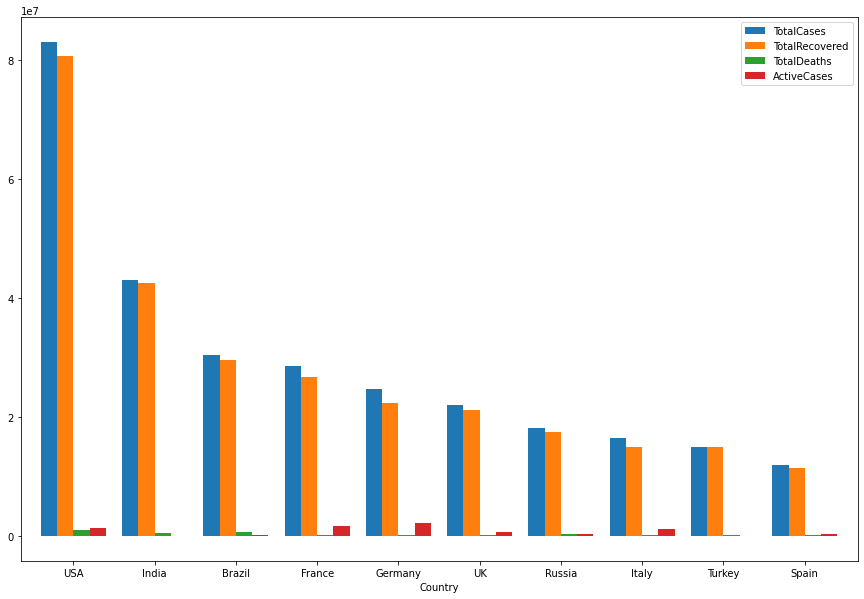

In [ ]:
df=top_10_totalcases[['Country','TotalCases', 'TotalRecovered', 'TotalDeaths','ActiveCases']]
df=df.set_index('Country')
# plt.figure(figsize=(100,50))
# X_axis=np.arange(len(top_10_totalcases))
# df.xticks(X_axis, top_10_totalcases['Country'])
df.plot.bar(rot=0,width=0.8,figsize=(15,10))

Nhìn vào biểu đồ, ta thấy :
+ Tốc độ phục hồi dịch bệnh của các nước đều rất tốt ('TotalRecovered' xấp xỉ gần bằng 'TotalCases'),nhất là India và Turkey.
+ Germany, France,Italy là những nước đang có tỉ lệ số ca đang điều trị ( ActiveCases/ TotalCases) lớn trong top10. Có vẻ như tình hình dịch bệnh vẫn còn đang căng thẳng ở những quốc gia này. Nhưng nhìn chung, các nước đều đang kiểm soát được dịch (tỉ lệ ActiveCases/ TotalCases thấp)
+ Tỉ lệ tử vong nhìn chung thấp, chứng tỏ bệnh không gây chết nhiều.

#### 2.Mối tương quan Serious,Critical so với ActiveCases.



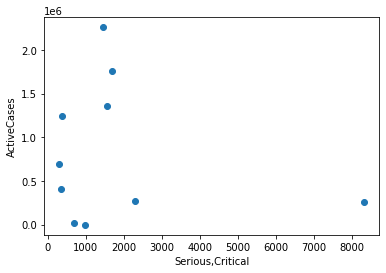

In [ ]:
plt.scatter(x=top_10_totalcases['Serious,Critical'], y=top_10_totalcases['ActiveCases'])
plt.xlabel('Serious,Critical')
plt.ylabel('ActiveCases')
plt.show()

Ta thấy hai biến 'Serious,Critical' và 'ActiveCases' không có mối liên hệ thuận hay nghịch với nhau.
Nhưng biểu đồ vẫn cho ta thấy tỷ lệ bị biến chứng nặng do bệnh gây ra không nhiều.

#### 3.Nhận xét mối quan hệ giữa TotCases/1M, Deaths/1M, Tests/1M 

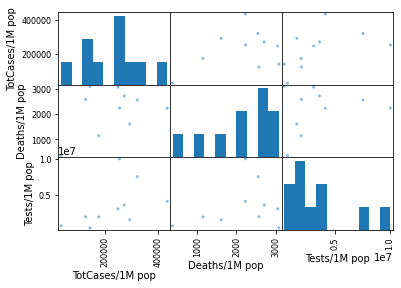

In [ ]:
df=top_10_totalcases[['TotCases/1M pop','Deaths/1M pop','Tests/1M pop']]
pd.plotting.scatter_matrix(df);

Nhìn vào scatter plot matrix, ta  thấy :
+ Các histogram của 'TotCases/1M pop', 'Tests/1M pop', 'Deaths/1M pop' đều không đạt phân phối chuẩn.
+ Histogram của 'TotCases/1M pop' có xu hướng lệch về bên phải, điều này cho thấy tổng số ca nhiễm đang có xu hướng giảm.
+ Histogram của 'Deaths/1M pop' lệch về bên phải nhiều hơn (negative) có vẻ như số ca tử vong đang có xu hướng giảm.
+ Histogram của 'Tests/1M pop' lệch về phía bên trái nhiều hơn có vẻ số lượng test vẫn đang có xu hướng tăng.
+ Histogram của 'TotCases/1M pop' cho thấy tổng số ca nhiễm vẫn đang có xu hướng tăng.
+ Biểu đồ histogram của 'Tests/1M pop'
+ Giữa 2 biến 'TotCases/1M pop' và 'Tests/1M pop' có mối quan hệ thuận (yếu), nghĩa là nếu 'Tests/1M pop' tăng thì 'TotCases/1M pop' cũng tăng.
+ Tồn tại mối liên hệ yếu giữa 'Deaths/1M pop' với hai biến còn lại. Nếu tổng test hoặc tổng số ca nhiễm tăng thì tỉ lệ tử vong cũng tăng lên.

#### 4.Liệu có quan hệ nhân quả giữa hai trường TotalCases và TotalTests không? (số ca nhiễm nhiều do có nhiều xét nghiệm?)


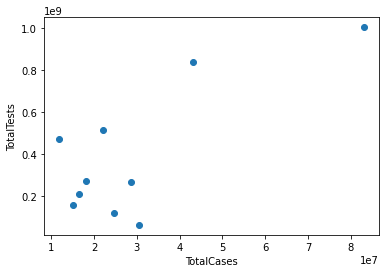

In [ ]:
plt.scatter(x=top_10_totalcases['TotalCases'], y=top_10_totalcases['TotalTests'])
plt.xlabel('TotalCases')
plt.ylabel('TotalTests')
plt.show()

Giữa 'TotalCases' và 'TotalTests' có mối quan hệ tương quan thuận với nhau, ta thấy nếu 'TotalCases' tăng thì 'TotalTests' cũng tăng và ngược lại.

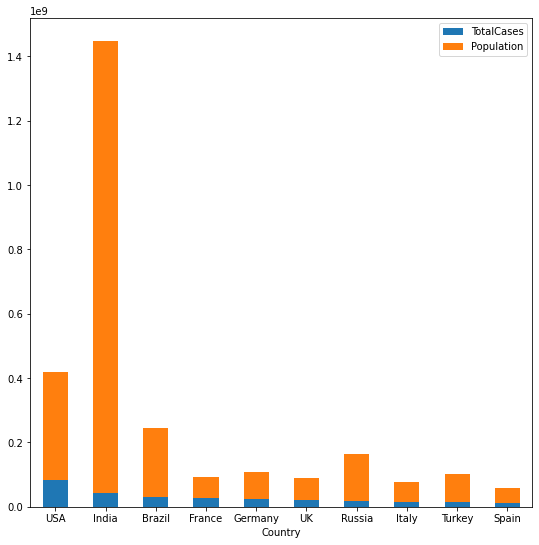

In [ ]:
df=top_10_totalcases[['Country','TotalCases', 'Population']]
#set index
df=df.set_index('Country')
plot= df.plot.bar(stacked=True,figsize=(9,9),rot=0)

Nhìn vào biểu đồ ta thấy quy mô dân số không ảnh hưởng lắm đến tổng số ca nhiễm.
India có tổng số dân lớn nhất nhưng tổng số ca nhiễm lại thấp hơn nhiều so với USA. 
Nếu xét về tỉ lệ TotalCases/Population thì có vẻ như tình hình dịch đang nghiêm trọng nhất ở France.

## Phân tích dữ liệu của 10 quốc gia có dân số lớn nhất trên thể giới

In [10]:
top10_population_df = covid_data_df.sort_values(by=['Population'], ascending=False, ignore_index=True).iloc[:10, :]
top10_population_df

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
0,China,215667.0,5022.0,184078.0,26567.0,458.0,150.0,3.0,1.600000e+08,111163.0,1.439324e+09
1,India,43075864.0,523803.0,42533377.0,18684.0,698.0,30665.0,373.0,8.374420e+08,596164.0,1.404717e+09
2,USA,83037059.0,1020660.0,80655685.0,1360714.0,1562.0,248214.0,3051.0,1.005251e+09,3004892.0,3.345382e+08
3,Indonesia,6046467.0,156240.0,5882062.0,8165.0,2771.0,21688.0,560.0,9.549578e+07,342534.0,2.787918e+08
4,Pakistan,1528412.0,30371.0,1494141.0,3900.0,131.0,6683.0,133.0,2.815648e+07,123114.0,2.287027e+08
5,Nigeria,255716.0,3143.0,249896.0,2677.0,11.0,1187.0,15.0,5.075820e+06,23560.0,2.154414e+08
6,Brazil,30433042.0,663484.0,29507557.0,262001.0,8318.0,141344.0,3082.0,6.377617e+07,296204.0,2.153117e+08
7,Bangladesh,1952674.0,29127.0,1895146.0,28401.0,1297.0,11645.0,174.0,1.398753e+07,83419.0,1.676780e+08
8,Russia,18174991.0,375727.0,17528963.0,270301.0,2300.0,124445.0,2573.0,2.734000e+08,1871982.0,1.460484e+08
9,Mexico,5738769.0,324294.0,5038150.0,376325.0,4798.0,43674.0,2468.0,1.580168e+07,120256.0,1.314001e+08


### Vẽ biểu đồ thể hiện TotalCases, TotalRecovered, TotalDeaths, TotalTests.

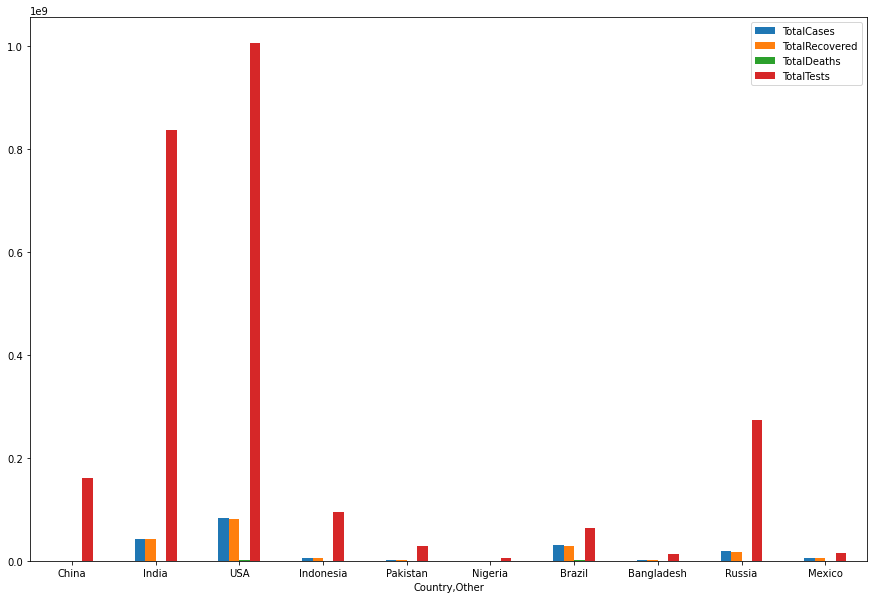

In [11]:
dfs = top10_population_df[['Country,Other', 'TotalCases', 'TotalRecovered', 'TotalDeaths', 'TotalTests']]
dfs = dfs.set_index('Country,Other')
ax = dfs.plot.bar(rot = 0, width = 0.5, figsize = (15,10));

Ta có thể thấy 1 sự tương quan tỷ lệ thuận với nhau giữa `TotalCases`, `TotalRecovered`, `TotalDeaths` và `TotalTests`. Tức là, số lượng thực hiện xét nghiệm càng nhiều sẽ số lượng ca nhiễm phát hiện được cũng gia tăng, dẫn đến nguy cơ có nhiều ca tử vong cũng như ca phục hồi ghi nhận.  
Tốc độ phục hồi dịch bệnh của các nước đều rất tốt (`TotalRecovered` xấp xỉ gần bằng `TotalCases`).  
Số ca tử vong (`TotalDeaths`) khá thấp nếu so sánh với `TotalCases`, `TotalRecovered`

### Tỷ lệ Serious,Critical so với ActiveCases.

In [12]:
#Iterate over all dates and find the serious cases and active cases
iterable1 = (top10_population_df.loc[i, 'Serious,Critical'] for i in range(10))
iterable2 = (top10_population_df.loc[i, 'ActiveCases'] for i in range(10))

top10_total_serious = np.fromiter(iterable1, dtype = float)
top10_total_activecases = np.fromiter(iterable2, dtype = float)

proportion = [np.sum(top10_total_serious), np.sum(top10_total_activecases)]

In [13]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.* np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

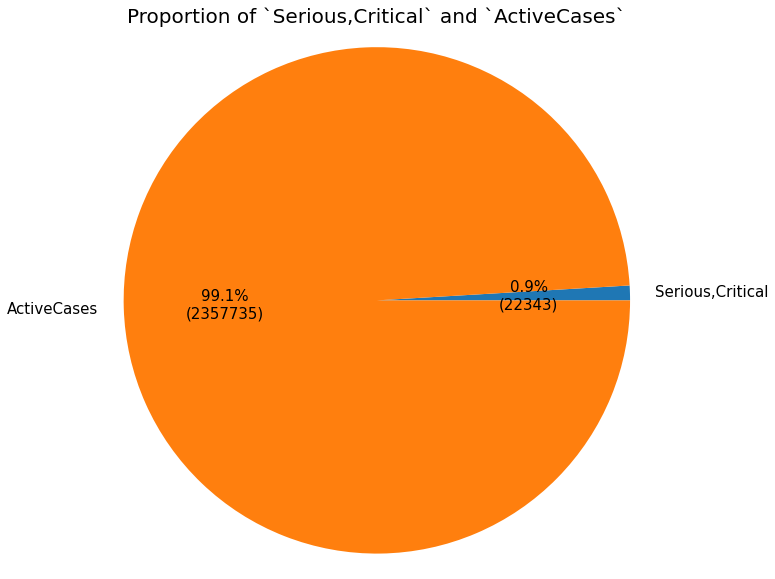

In [14]:
#Plot pie chart to show the proportion between total deaths and total recovered
fig, ax = plt.subplots(figsize = (10,10)) 
ax.pie(proportion,
       labels = ['Serious,Critical', 'ActiveCases'],
       autopct = lambda pct: func(pct, proportion),
       textprops = {'fontsize': 15})
ax.axis('equal')
ax.set_title('Proportion of `Serious,Critical` and `ActiveCases`', size = 20)
plt.show() 

Có thể thấy rằng tỷ lệ các ca bệnh nặng (`Serious,Critical`) chỉ chiếm tỷ lệ khá nhỏ (`0.9%` trong tổng số ca hiện tại). Có thể do biến thể mới có sức lây lan trong cộng đồng mạnh hơn nhưng độc lực đã giảm đi cộng với việc vaccine đã được phủ rộng rãi khiến tỷ lệ chuyển nặng giảm đi rất nhiều.

### Vẽ biểu đồ thể hiện TotCases/1M, Deaths/1M, Tests/1M.

In [15]:
# Vẽ biểu đồ thể hiện TotCases/1M, Deaths/1M, Tests/1M.
def plot_bar(country, col, set_title):
  # Figure Size
  fig, ax = plt.subplots(figsize = (16, 9))
  
  # Horizontal Bar Plot
  ax.barh(country, col)
  
  # Remove axes splines
  for s in ['top', 'bottom', 'left', 'right']:
      ax.spines[s].set_visible(False)
  
  # Remove x, y Ticks
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  
  # Add padding between axes and labels
  ax.xaxis.set_tick_params(pad = 5)
  ax.yaxis.set_tick_params(pad = 10)
  
  # Add x, y gridlines
  ax.grid(b = True, color = 'grey',
          linestyle = '-.', linewidth = 0.5,
          alpha = 0.2)
  
  # Show top values
  ax.invert_yaxis()
  
  # Add annotation to bars
  for i in ax.patches:
      plt.text(i.get_width() + 0.2, i.get_y() + 0.5,
              str(round((i.get_width()), 2)),
              fontsize = 10, fontweight = 'bold',
              color = 'grey')
  
  # Add Plot Title
  ax.set_title(set_title, loc = 'left')
  
  # Add Text watermark
  fig.text(0.9, 0.15, "", fontsize = 12,
          color = 'grey', ha = 'right', va = 'bottom',
          alpha = 0.7)
  
  # Show Plot
  plt.show()

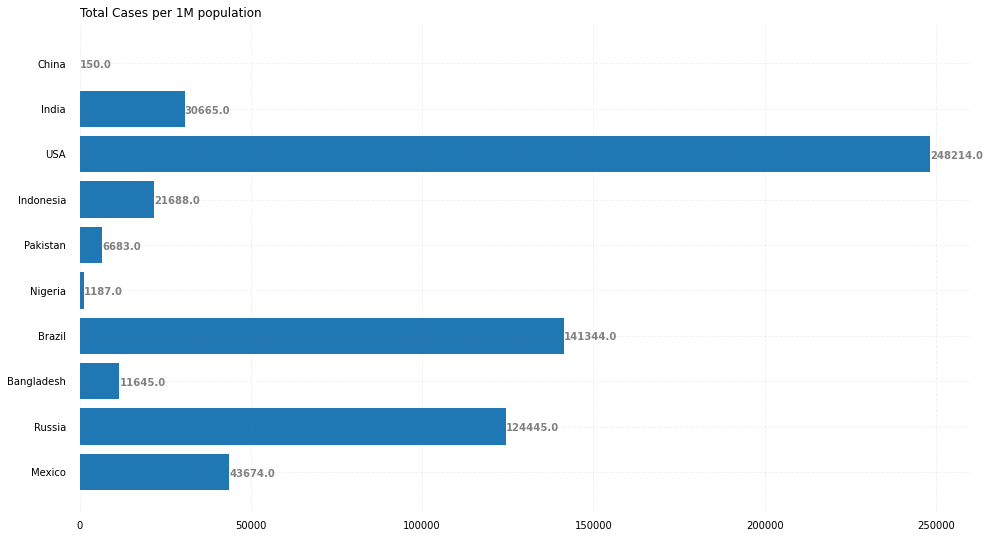

In [16]:
country = list(top10_population_df['Country,Other'])
totcases_1M = list(top10_population_df['TotCases/1M pop'])
plot_bar(country, totcases_1M, 'Total Cases per 1M population')

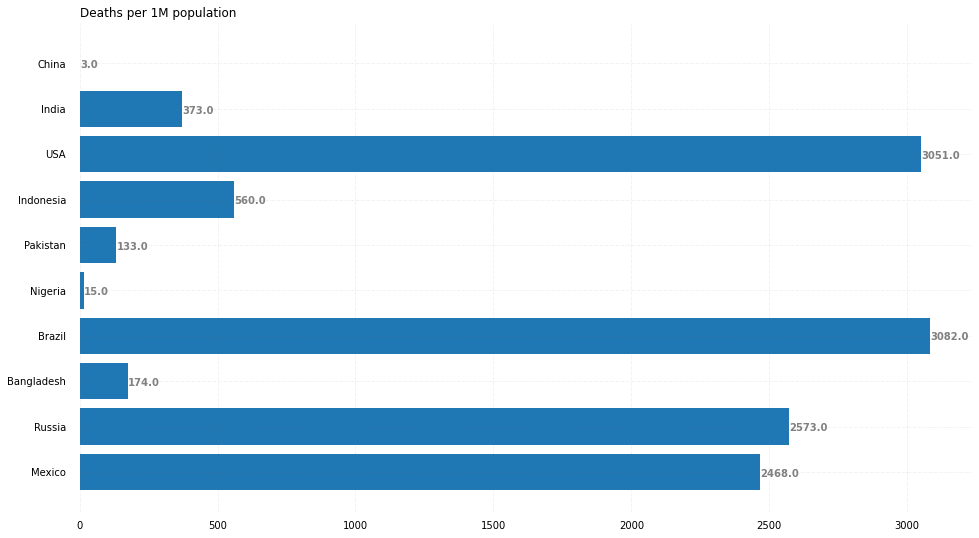

In [17]:
deathcases_1M = list(top10_population_df['Deaths/1M pop'])
plot_bar(country, deathcases_1M, 'Deaths per 1M population')

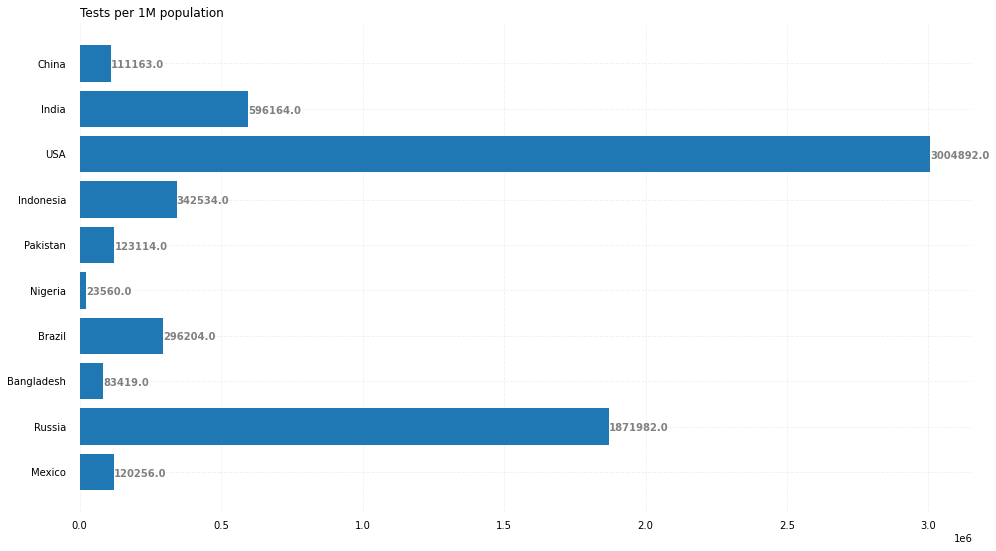

In [18]:
test_1M = list(top10_population_df['Tests/1M pop'])
plot_bar(country, test_1M, 'Tests per 1M population')

Bây giờ ta sẽ xem có liên quan gì giữa `TotCases/1M pop` và `Tests/1M pop` hay không bằng cách biểu diễn chúng trên cùng 1 biểu đồ.

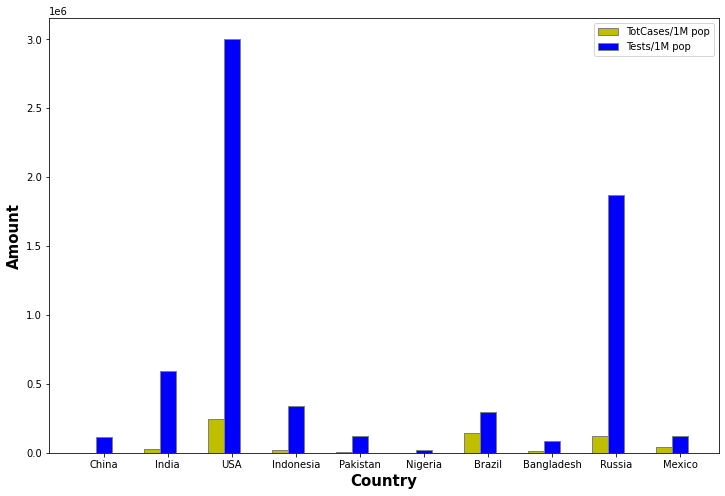

In [19]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
# Set position of bar on X axis
br1 = np.arange(len(totcases_1M))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, totcases_1M, color = 'y', width = barWidth,
        edgecolor = 'grey', label ='TotCases/1M pop')
plt.bar(br2, test_1M, color = 'b', width = barWidth,
        edgecolor = 'grey', label = 'Tests/1M pop')
 
# Adding Xticks
plt.xlabel('Country', fontweight = 'bold', fontsize = 15)
plt.ylabel('Amount', fontweight = 'bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(totcases_1M))], country)
 
plt.legend()
plt.show()

Từ các biểu đồ trên ta thấy Mỹ và Nga là 2 quốc gia tiến hành nhiều xét nghiệm nhất nếu tính theo tỷ lệ trên 1 triệu dân. Tuy nhiên ở 1 số quốc gia có tỷ lệ này ở mức thấp, tổng số ca nhiễm và tử vong lại chiếm tỷ trọng khá cao (như Mexico, Brazil). Cho nên 2 trường `TotCases/1M pop` vaf `Tests/1M pop` chưa thể hiện mối liên quan nào rõ ràng.

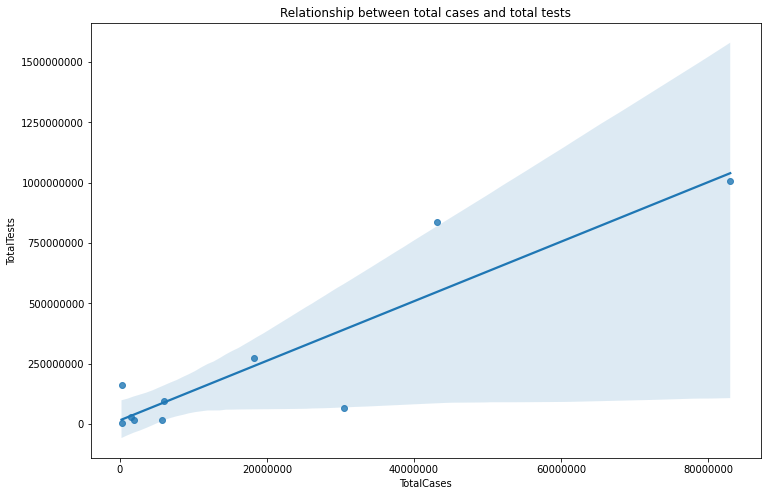

In [20]:
# Liệu có quan hệ nhân quả giữa hai trường TotalCases và TotalTests không? 
plt.figure(figsize = (12,8))
sns.regplot(data = top10_population_df, x = 'TotalCases', y = 'TotalTests')
plt.ticklabel_format(style = 'plain')
plt.title('Relationship between total cases and total tests')
plt.show()

Ta thấy có một mối quan hệ tuyến tính giữa 2 cột này nên có thể đặt ra giải thuyết có mối liên hệ nhân quả giữa chúng (tức là số ca nhiễm một quốc gia ghi nhận nhiều hơn do quốc gia đó đã tiến hành nhiều xét nghiệm chẩn đoán)

### So sánh tỷ lệ giữa TotalCases và TotalTests

In [21]:
#Iterate over all dates and find the serious cases and active cases
iter1 = (top10_population_df.loc[i, 'TotalCases'] for i in range(10))
iter2 = (top10_population_df.loc[i, 'TotalTests'] for i in range(10))

top10_total_cases = np.fromiter(iter1, dtype = float)
top10_total_tests = np.fromiter(iter2, dtype = float)

proportion = [np.sum(top10_total_cases), np.sum(top10_total_tests)]

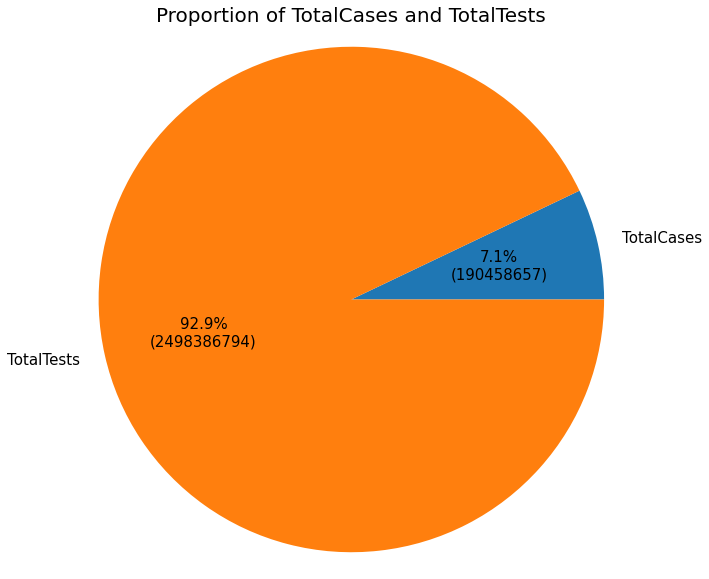

In [22]:
#Plot pie chart to show the proportion between total deaths and total recovered
fig,ax = plt.subplots(figsize = (10,10)) 
ax.pie(proportion,
       labels = ['TotalCases', 'TotalTests'],
       autopct = lambda pct: func(pct, proportion),
       textprops = {'fontsize':15})
ax.axis('equal')
ax.set_title('Proportion of TotalCases and TotalTests', size=20)
plt.show() 

Như vậy ta có thể kết luận được:  
- Số lượng test có mối tương quan với số lượng ca nhiễm.  
- Tỷ lệ tổng số ca nhiễm trên tổng số xét nghiệm là khoảng `7.1%`, tức là cứ 100 xét nghiệm thì phát hiện được khoảng 7 ca bệnh. Điều này cần được đánh giá đúng hơn qua việc xác định xem xét nghiệm thực hiện là xét nghiệm nhanh hay xét nghiệm sinh học phân tử (PCR), vì độ nhạy của các xét nghiệm này là khác nhau.

## Phân tích dữ liệu của 10 quốc gia được chọn ngẫu nhiên

In [ ]:
np.random.seed(2022)
ten_random_nums = np.random.randint(1,230,size=10)
ten_random_nums

array([126, 221, 174, 113, 178, 184,  89,  19,  25, 145])

In [ ]:
ten_random_countries_df = covid_data_df.iloc[ten_random_nums]
ten_random_countries_df

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
126,Angola,99194.0,1900.0,97149.0,145.0,NaN,2856.0,55.0,1499795.0,43188.0,34727180.0
221,Marshall Islands,17.0,NaN,14.0,3.0,NaN,284.0,NaN,NaN,NaN,59918.0
174,Gibraltar,17837.0,102.0,16579.0,1156.0,NaN,529712.0,3029.0,534283.0,15866807.0,33673.0
113,Uganda,164069.0,3596.0,100205.0,60268.0,2.0,3392.0,74.0,2612795.0,54016.0,48370334.0
178,San Marino,16437.0,115.0,15960.0,362.0,4.0,482575.0,3376.0,149271.0,4382461.0,34061.0
184,Bermuda,13488.0,131.0,12981.0,376.0,NaN,218044.0,2118.0,876273.0,14165651.0,61859.0
89,Mongolia,469885.0,2179.0,313256.0,154450.0,192.0,139248.0,646.0,4030048.0,1194288.0,3374435.0
19,Poland,5995674.0,116042.0,5334621.0,545011.0,1321.0,158737.0,3072.0,36092285.0,955553.0,37771112.0
25,Austria,4140543.0,18156.0,4042540.0,79847.0,87.0,455005.0,1995.0,183002443.0,20110150.0,9100004.0
145,Belize,57497.0,676.0,56604.0,217.0,6.0,139973.0,1646.0,539513.0,1313409.0,410773.0


#### 1. Nhận xét tổng quan về TotalCases, TotalRecovered, TotalDeaths, ActiveCases

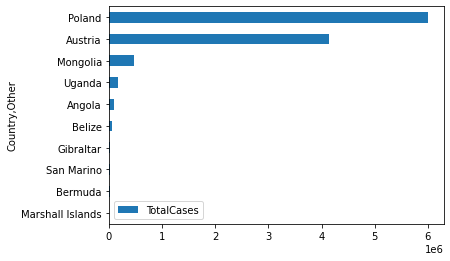

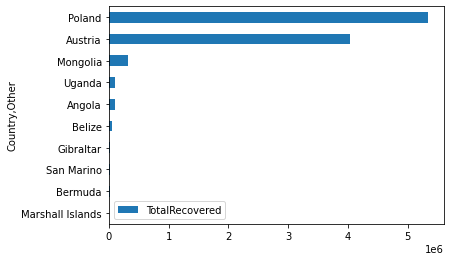

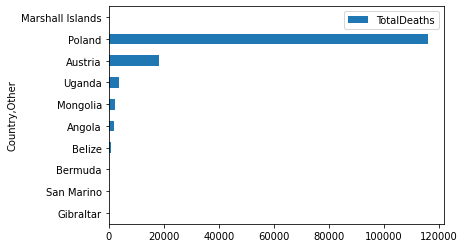

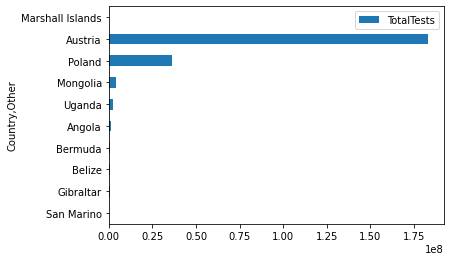

In [ ]:
ten_random_countries_df.sort_values('TotalCases').plot.barh(x='Country,Other',y='TotalCases');
ten_random_countries_df.sort_values('TotalRecovered').plot.barh('Country,Other','TotalRecovered');
ten_random_countries_df.sort_values('TotalDeaths').plot.barh('Country,Other','TotalDeaths');
ten_random_countries_df.sort_values('TotalTests').plot.barh('Country,Other','TotalTests');

Nhận xét: 

- Poland là quốc gia có nhiều ca nhiễm trong nhóm 10 quốc gia này (trên 6 triệu người vào ngày này). Theo sau là Austria với khoảng 4 triệu ca nhiễm.

- Một vài quốc gia có ca nhiễm rất ít (dưới 100.000 ca nhiễm) như Angola, Belize, Gilbratar, San Marino, Bermuda, Marshall Islands.

- Trên 5 triệu người ở Poland đã hồi phục sau khi mắc COVID-19. Con số này ở Austria là trên 4 triệu người.

- Đặc biệt: Marshall Islands không ghi nhận TotalDeaths, TotalTests vào ngày này.

#### 2.Mối tương quan Serious,Critical so với ActiveCases.

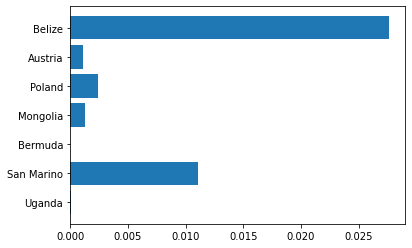

In [ ]:
seroius_active = ten_random_countries_df['Serious,Critical'] / ten_random_countries_df['ActiveCases']
plt.barh(ten_random_countries_df['Country,Other'],seroius_active);

Nhận xét:

- 3 quốc gia: Austria, Poland, Mongolia có tỷ lệ Serious,Critical trên ActiveCases trung bình là 0.001
- Riêng Uganda có tỷ lệ cực thấp, chỉ 0.000033.
- 2 quốc gia có tỷ lệ cao trên biểu đồ này là Uganda và Belize lần lượt có giá trị là trên 0.01 và 0.025.
- Vào ngày này thì tỷ lệ Serious,Critical trên ActiveCases đều dưới 0.1

#### 3. Vẽ biểu đồ thể hiện TotCases/1M, Deaths/1M, Tests/1M 

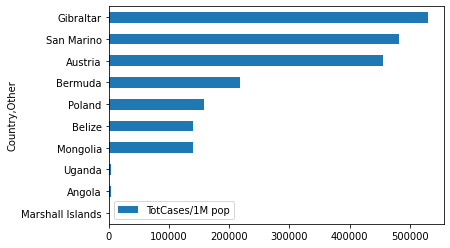

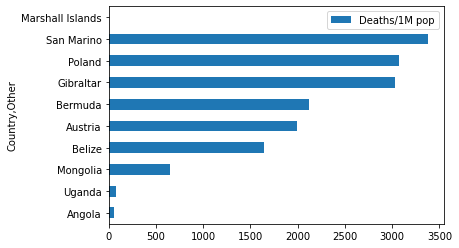

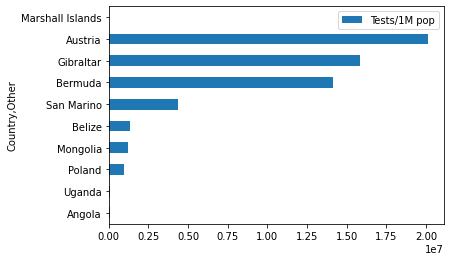

In [ ]:
ten_random_countries_df.sort_values('TotCases/1M pop').plot.barh('Country,Other','TotCases/1M pop')
ten_random_countries_df.sort_values('Deaths/1M pop').plot.barh('Country,Other','Deaths/1M pop')
ten_random_countries_df.sort_values('Tests/1M pop').plot.barh('Country,Other','Tests/1M pop');

Nhận xét:

1. Số ca nhiễm trên 1 triệu dân ở 3 quốc gia Gilbraltar, San Marino và Austria là từ 400.000 đến trên 500.000 người.
2. Số ca nhiễm trên 1 triệu dân ở 4 quốc gia Bermuda, Poland, Belize, Mongolia là từ 150.000 đến trên 200.000. 3 quốc gia còn lại có số lượng rất thấp.

3. Số ca tử vong trên 1 triệu dân cao nhất ở San Marino. Tiếp sau là hai quốc gia Gilbraltar, Poland.

4. Bermuda, Austria, Belize và Mongolia có số ca tử vong trên 1 triệu dân là từ 500 đến trên 2000 người.

5. Uganda và Angola số ca tử vong trên 1 triệu dân rất thấp.

6. Marshall Island không có số liệu về số Tests/1M pop, Deaths/1M pop.

7. Austria, Gilbraltar, Bermuda có số Tests/1M pop từ 15.000.000 đến trên 20.000.000 người

8. San Marino có số Tests/1M pop gần 5.000.000. Những quốc gia còn lại có con số này rất thấp hay không có số liệu về thuộc tính này.


#### 4. Quan hệ nhân quả giữa hai trường TotalCases và TotalTests

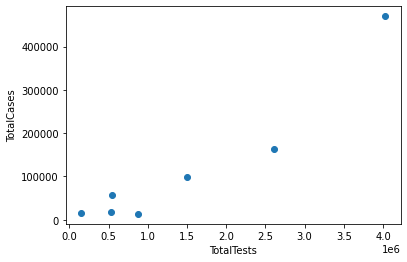

In [ ]:
plt.scatter(ten_random_countries_df['TotalTests'][[184,178,174,145,126,113,89]],ten_random_countries_df['TotalCases'][[184,178,174,145,126,113,89]]);
plt.xlabel('TotalTests');
plt.ylabel('TotalCases');

#### 5. Tỷ lệ TotalCases và TotalTests

In [ ]:
cases_tests = ten_random_countries_df['TotalCases'] / ten_random_countries_df['TotalTests']
cases_tests

126    0.066138
221         NaN
174    0.033385
113    0.062794
178    0.110115
184    0.015392
89     0.116595
19     0.166121
25     0.022626
145    0.106572
dtype: float64

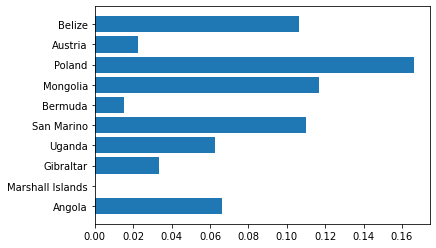

In [ ]:
plt.barh(ten_random_countries_df['Country,Other'],cases_tests);

Nhận xét:

- Poland có tỷ lệ TotalCases trên TotalTests cao nhất trong nhóm này với tỷ lệ là trên 0.16
- Tiếp sau là những nước Mongolia, Belize, San Marino với tỷ lệ trên 0.1
- Tỷ lệ trên 0.06 là những quốc gia như Angola, Uganda.
- Dưới 0.04 là những quốc gia như Gilbraltar, Bermudai, Austria.
- Marshall Islands không có thông tin về tỷ lệ này.